<a href="https://colab.research.google.com/github/meghana-2006/Machine_Learning_lab/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9993234100135318

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2139
           1       1.00      1.00      1.00      2295

    accuracy                           1.00      4434
   macro avg       1.00      1.00      1.00      4434
weighted avg       1.00      1.00      1.00      4434

Confusion Matrix:
 [[2137    2]
 [   1 2294]]


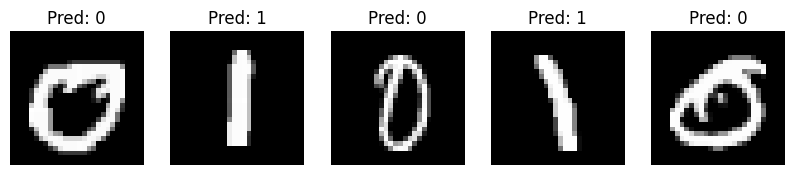

In [3]:
# Step 1: Import libraries
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)

# Step 3: Filter digits 0 and 1
mask = (y == 0) | (y == 1)
X_01 = X[mask]
y_01 = y[mask]

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_01, y_01, test_size=0.3, random_state=42)

# Step 5: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Evaluate model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 7: Visualize a few test predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()
